# Preprocessing

In [3]:
PATH = os.path.join("")
filename_1 = "marketdata_sample.csv"
filename_2 = "news_sample.csv"


def load_data(filename, my_path=PATH):
    csv_path = os.path.join(my_path, filename)
    return pd.read_csv(csv_path)

In [4]:
mkt = load_data(filename_1)
nws = load_data(filename_2)
print(mkt.shape, nws.shape)

(100, 16) (100, 35)


- **subjects** (category) - topic codes and company identifiers that relate to this news item. Topic codes describe the news item's subject matter. These can cover asset classes, geographies, events, industries/sectors, and other types.

In [61]:
## CREATE A DATAFRAME HOLDING EACH SUBJECT AND IT's TOTAL OCCURRENCE FOR EVERY NEWS
subjects = {}
n_sub = []
for subject_nws in nws.subjects:
    n = 0
    for s in subject_nws.replace('{','').replace('}','').replace("'",'').replace(" ",'').split(','):
        n += 1
        if s in subjects.keys():
            subjects[s]+=1
        else:
            subjects[s] = 1
    n_sub.append(n) 
print(len(subjects), np.mean(n_sub))

112 10.58


- **Audiences**(category) - identifies which desktop news product(s) the news item belongs to. They are typically tailored to specific audiences. (e.g. "M" for Money International News Service and "FB" for French General News Service)

In [57]:
## CREATE A DATAFRAME HOLDING EACH SUBJECT AND IT's TOTAL OCCURRENCE FOR EVERY NEWS
audience = {}
n_audi = []
for audi in nws.audiences:
    n = 0
    for a in audi.replace('{','').replace('}','').replace("'",'').replace(" ",'').split(','):
        n += 1 
        if a in audience.keys():
            audience[a] += 1
        else:
            audience[a] = 1
    n_audi.append(n)        

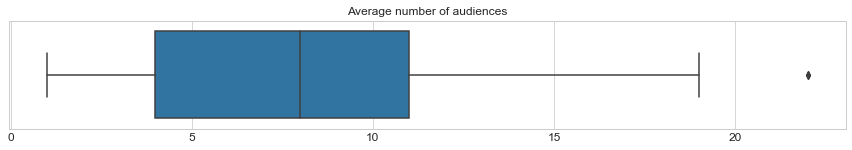

In [78]:
fig = plt.figure(figsize=(15,2))
sns.boxplot(n_audi, orient='h')
plt.title('Average number of audiences')
plt.show()

In [59]:
print(len(audience), np.mean(n_audi))

52 8.18


*wordCount is highly correlated with bodySize (ρ = 0.98939)*
- **bodySize**(int32) - the size of the current version of the story body in characters (correlated with wordCount)

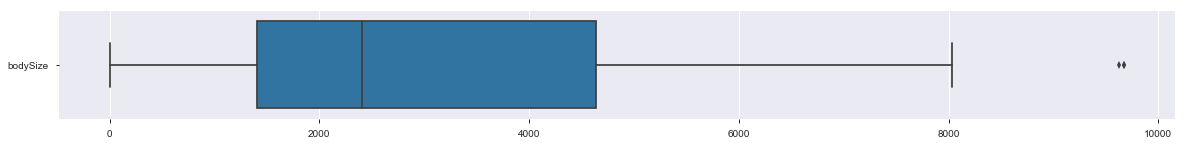

In [140]:
fig = plt.figure(figsize = (20,2))
sns.boxplot(data=nws.loc[:,['bodySize']], orient="h")
plt.show()

In [ ]:
nws.loc[nws.bodySize==0]

- **companyCount**(int8) - the number of companies explicitly listed in the news item in the subjects field

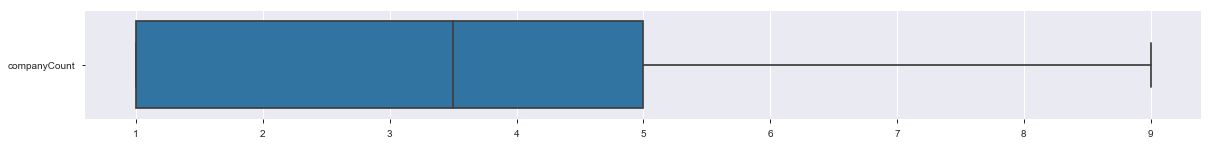

In [147]:
fig = plt.figure(figsize = (20,2))
sns.boxplot(data=nws.loc[:,['companyCount']], orient="h")
plt.title('Average CompanyCount')
plt.show()

- **marketCommentary**(bool) - boolean indicator that the item is discussing general market conditions, such as "After the Bell" summaries

In [151]:
nws.marketCommentary.value_counts()

False    87
True     13
Name: marketCommentary, dtype: int64

- **sentenceCount**(int16) - the total number of sentences in the news item. Can be used in conjunction with firstMentionSentence to determine the relative position of the first mention in the item.

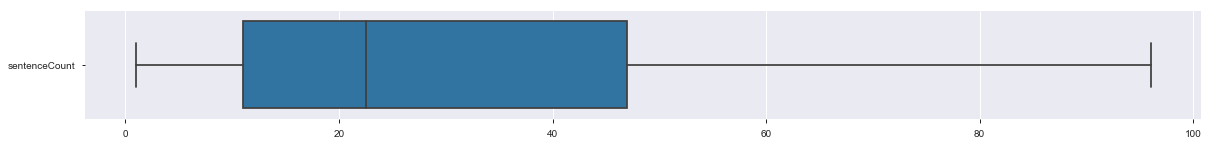

In [152]:
fig = plt.figure(figsize = (20,2))
sns.boxplot(data=nws.loc[:,['sentenceCount']], orient="h")
plt.show()

*wordCount is highly correlated with bodySize (ρ = 0.98939)*
- **wordCount**(int32) - the total number of lexical tokens (words and punctuation) in the news item

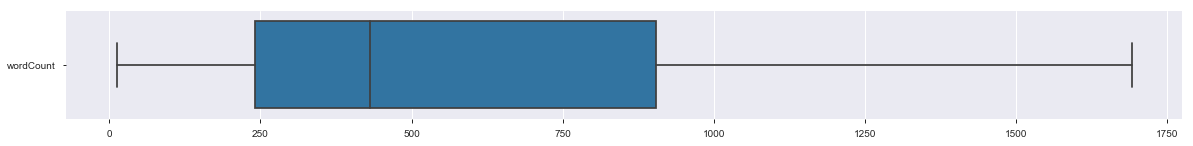

In [160]:
fig = plt.figure(figsize = (20,2))
sns.boxplot(data=nws.loc[:,['wordCount']], orient="h")
plt.show()

- **assetCodes**(category) - list of assets mentioned in the item
- **assetName**(category) - name of the asset

- **firstMentionSentence**(int16) - the first sentence, starting with the headline, in which the scored asset is mentioned.
1: headline
2: first sentence of the story body
3: second sentence of the body, etc
0: the asset being scored was not found in the news item's headline or body text. As a result, the entire news item's text (headline + body) will be used to determine the sentiment score.

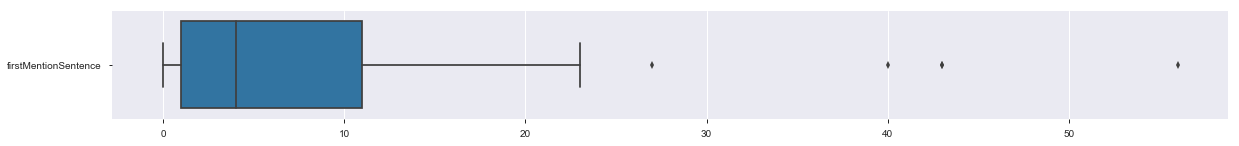

In [164]:
fig = plt.figure(figsize = (20,2))
sns.boxplot(data=nws.loc[:,['firstMentionSentence']], orient="h")
plt.show()

- **relevance**(float32) - a decimal number indicating the relevance of the news item to the asset. It ranges from 0 to 1. If the asset is mentioned in the headline, the relevance is set to 1. When the item is an alert (urgency == 1), relevance should be gauged by firstMentionSentence instead.

In [241]:
nws.loc[:, ['urgency','relevance','firstMentionSentence']].sort_values('relevance', ascending=False).head()

,urgency,relevance,firstMentionSentence
63,3,1.0,1
17,3,1.0,1
35,3,1.0,1
34,3,1.0,1
79,3,1.0,2


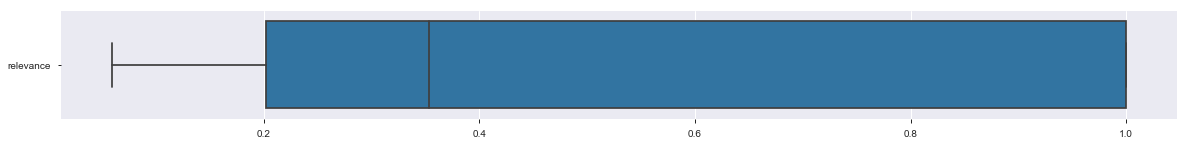

In [165]:
fig = plt.figure(figsize = (20,2))
sns.boxplot(data=nws.loc[:,['relevance']], orient="h")
plt.show()

- **sentimentClass**(int8) - indicates the predominant sentiment class for this news item with respect to the asset. The indicated class is the one with the highest probability.

In [166]:
nws.sentimentClass.unique()

array([-1,  0,  1])

- **sentimentNegative**(float32) - probability that the sentiment of the news item was negative for the asset
- **sentimentNeutral**(float32) - probability that the sentiment of the news item was neutral for the asset
- **sentimentPositive**(float32) - probability that the sentiment of the news item was positive for the asset


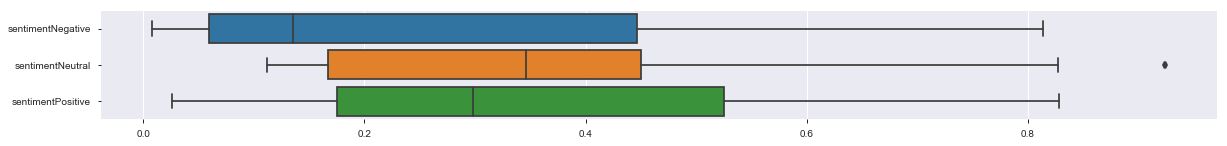

In [168]:
fig = plt.figure(figsize = (20,2))
sns.boxplot(data=nws.loc[:,['sentimentNegative','sentimentNeutral','sentimentPositive']], orient="h")
plt.show()

- **sentimentWordCount**(int32) - the number of lexical tokens in the sections of the item text that are deemed relevant to the asset. This can be used in conjunction with wordCount to determine the proportion of the news item discussing the asset.

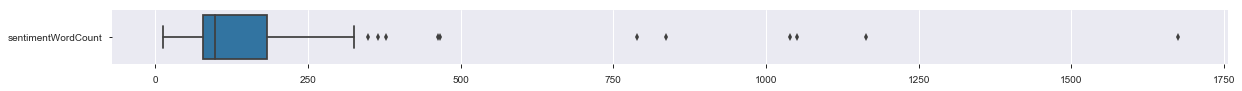

In [170]:
fig = plt.figure(figsize = (20,1))
sns.boxplot(data=nws.loc[:,['sentimentWordCount']], orient="h")
plt.show()

*For obvious reasons these are highly correlated*
- **noveltyCount12H**(int16) - The 12 hour novelty of the content within a news item on a particular asset. It is calculated by comparing it with the asset-specific text over a cache of previous news items that contain the asset.
- **noveltyCount24H**(int16) - same as above, but for 24 hours
- **noveltyCount3D**(int16) - same as above, but for 3 days
- **noveltyCount5D**(int16) - same as above, but for 5 days
- **noveltyCount7D**(int16) - same as above, but for 7 days

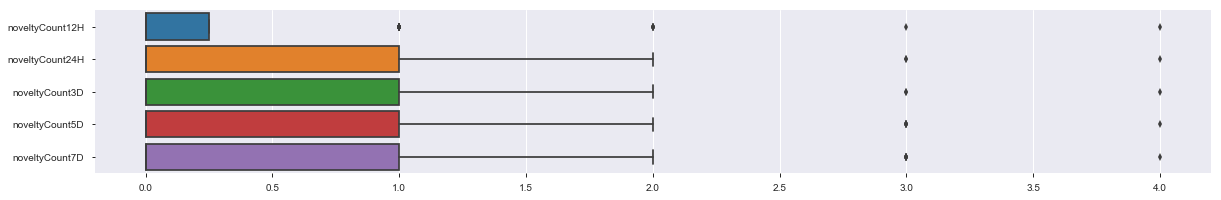

In [180]:
fig = plt.figure(figsize = (20,3))
sns.boxplot(data=nws.loc[:,['noveltyCount12H','noveltyCount24H','noveltyCount3D','noveltyCount5D','noveltyCount7D']], orient="h")
plt.show()

*For obvious reasons these are highly correlated*
- **volumeCounts12H**(int16) - the 12 hour volume of news for each asset. A cache of previous news items is maintained and the number of news items that mention the asset within each of five historical periods is calculated.
- **volumeCounts24H**(int16) - same as above, but for 24 hours
- **volumeCounts3D**(int16) - same as above, but for 3 days
- **volumeCounts5D**(int16) - same as above, but for 5 days
- **volumeCounts7D**(int16) - same as above, but for 7 days

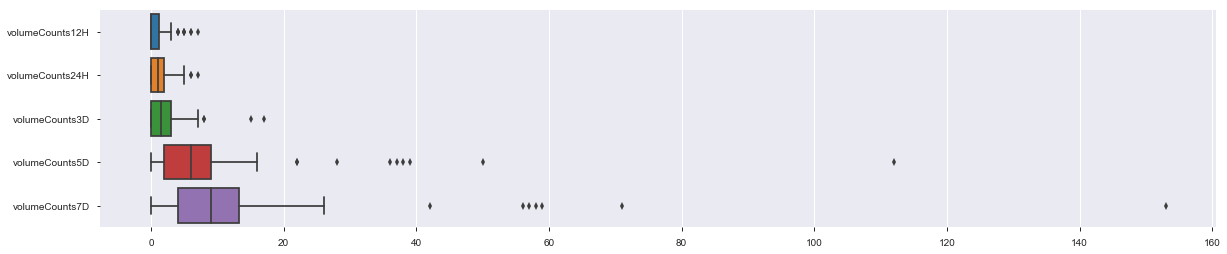

In [179]:
fig = plt.figure(figsize = (20,4))
sns.boxplot(data=nws.loc[:,['volumeCounts12H','volumeCounts24H','volumeCounts3D','volumeCounts5D','volumeCounts7D']], orient="h")
plt.show()

---

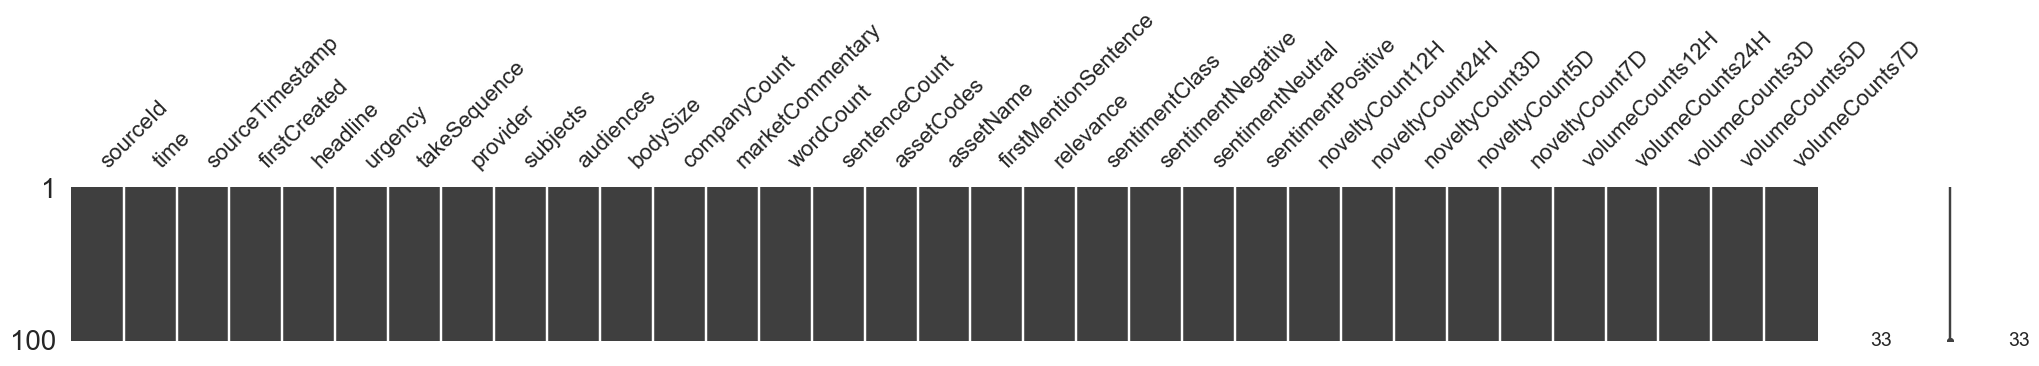

In [255]:
predictor_cols = ["sourceId","time","sourceTimestamp","firstCreated",
         "headline","urgency", 'takeSequence','provider','subjects','audiences', 
         'bodySize', 'companyCount','marketCommentary','wordCount', 'sentenceCount',
         'assetCodes','assetName','firstMentionSentence','relevance',
         'sentimentClass','sentimentNegative','sentimentNeutral','sentimentPositive',
         'noveltyCount12H','noveltyCount24H','noveltyCount3D','noveltyCount5D','noveltyCount7D',
         'volumeCounts12H','volumeCounts24H','volumeCounts3D','volumeCounts5D','volumeCounts7D'
        ]

mentioned = ['provider','subjects','audiences','assetCodes','assetName']
flags = ['urgency', 'takeSequence', 'sentimentClass']
numerique = ['companyCount', 'bodySize', 'wordCount', 'sentenceCount','firstMentionSentence','relevance',
             'sentimentNegative','sentimentNeutral','sentimentPositive']
msn.matrix(nws.loc[:,predictor_cols], figsize=(25,2))

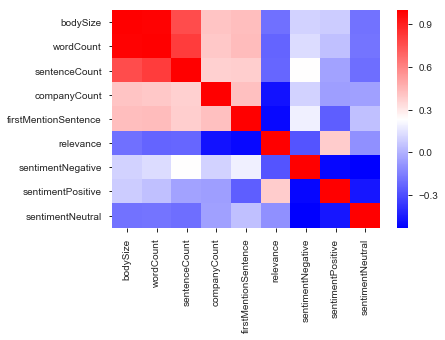

In [224]:
col_corr = ['bodySize', 'wordCount', 'sentenceCount','companyCount', 'firstMentionSentence',
        'relevance','sentimentNegative', 'sentimentPositive','sentimentNeutral']
mycorr = news_train_df.loc[:,col_corr].corr()
sns.heatmap(mycorr, cmap="bwr")

# Market

In [271]:
mkt.time.unique()

array(['2007-02-01 22:00:00+00:00'], dtype=object)

- **time**(datetime64[ns, UTC]) - the current time (in marketdata, all rows are taken at 22:00 UTC)
***therefore useless***

- **assetCode**(object) - a unique id of an asset

- **assetName**(category) - the name that corresponds to a group of assetCodes. These may be "Unknown" if the corresponding assetCode does not have any rows in the news data.

In [5]:
mkt[mkt.assetName=='Unknown']

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
10,2007-02-01 22:00:00+00:00,ABY.N,Unknown,0.0,9037700.0,3.17,3.23,-0.024615,0.022152,NaN,NaN,0.178439,0.200743,NaN,NaN,0.016963
17,2007-02-01 22:00:00+00:00,AD.N,Unknown,0.0,299100.0,32.80,32.80,0.000610,0.000915,NaN,NaN,0.003058,0.003979,NaN,NaN,0.001977


- **universe**(float64) - a boolean indicating whether or not the instrument on that day will be included in scoring. This value is not provided outside of the training data time period. The trading universe on a given date is the set of instruments that are avilable for trading (the scoring function will not consider instruments that are not in the trading universe). The trading universe changes daily.

In [273]:
mkt.universe.unique()

array([ 1.,  0.])

- **volume**(float64) - trading volume in shares for the day

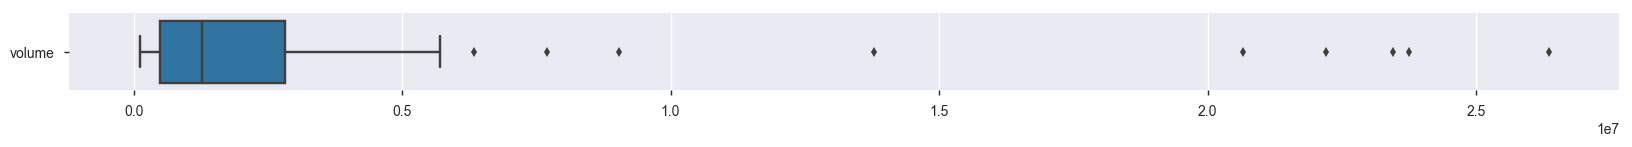

In [274]:
fig = plt.figure(figsize = (20,1))
sns.boxplot(data=mkt.loc[:,['volume']], orient="h")
plt.show()

- **close**(float64) - the close price for the day (not adjusted for splits or dividends)
- **open**(float64) - the open price for the day (not adjusted for splits or dividends)

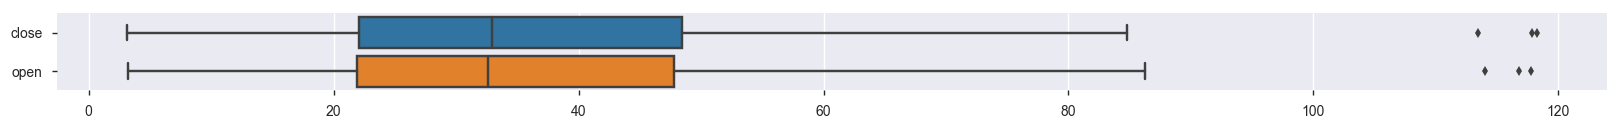

In [275]:
fig = plt.figure(figsize = (20,1))
sns.boxplot(data=mkt.loc[:,['close','open']], orient="h")
plt.show()

- **returnsClosePrevRaw1**(float64) - see returns explanation above
- **returnsOpenPrevRaw1**(float64) - see returns explanation above
- **returnsClosePrevRaw10**(float64) - see returns explanation above
- **returnsOpenPrevRaw10**(float64) - see returns explanation above

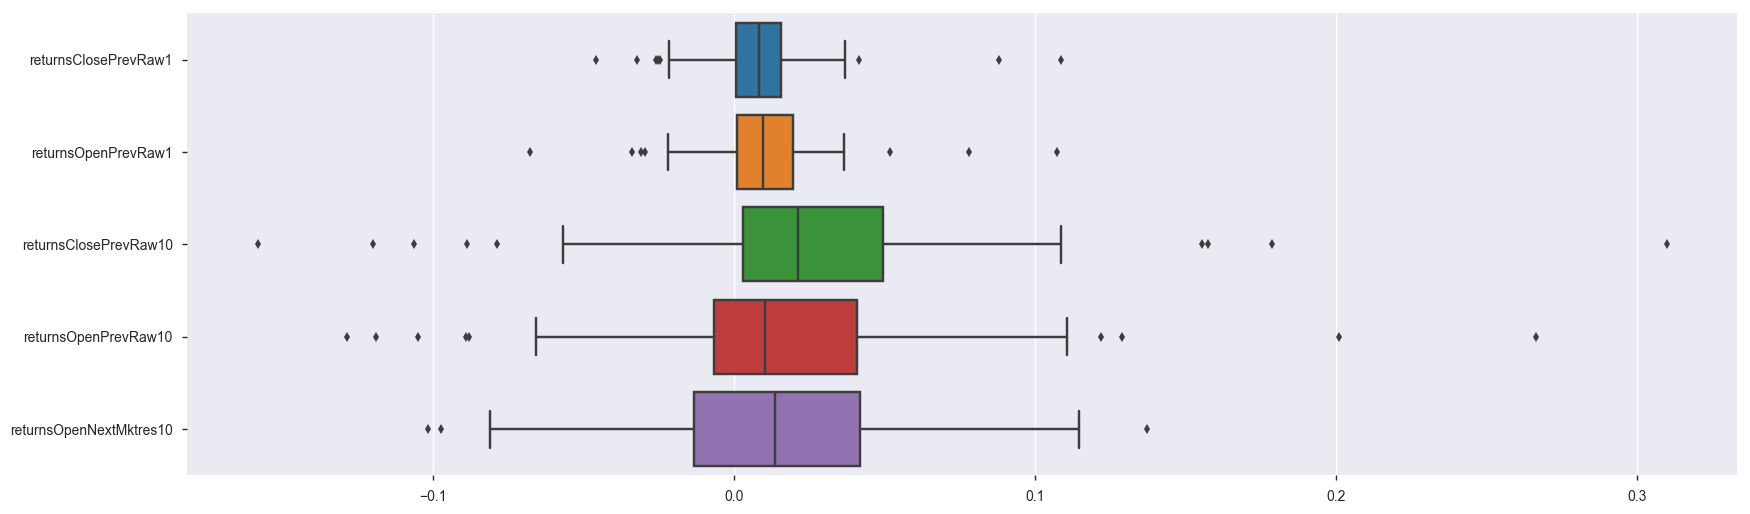

In [276]:
fig = plt.figure(figsize = (20,6))
sns.boxplot(data=mkt.loc[:,['returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsOpenNextMktres10']], orient="h")
plt.show()

- **returnsOpenNextMktres10**(float64) - 10 day, market-residualized return. This is the target variable used in competition scoring. The market data has been filtered such that returnsOpenNextMktres10 is always not null.

- **returnsClosePrevMktres1**(float64) - see returns explanation above
- **returnsOpenPrevMktres1**(float64) - see returns explanation above
- **returnsClosePrevMktres10**(float64) - see returns explanation above
- **returnsOpenPrevMktres10**(float64) - see returns explanation above

***...Missing values***

In [259]:
mkt.head(2)

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,1.0,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,0.0,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803


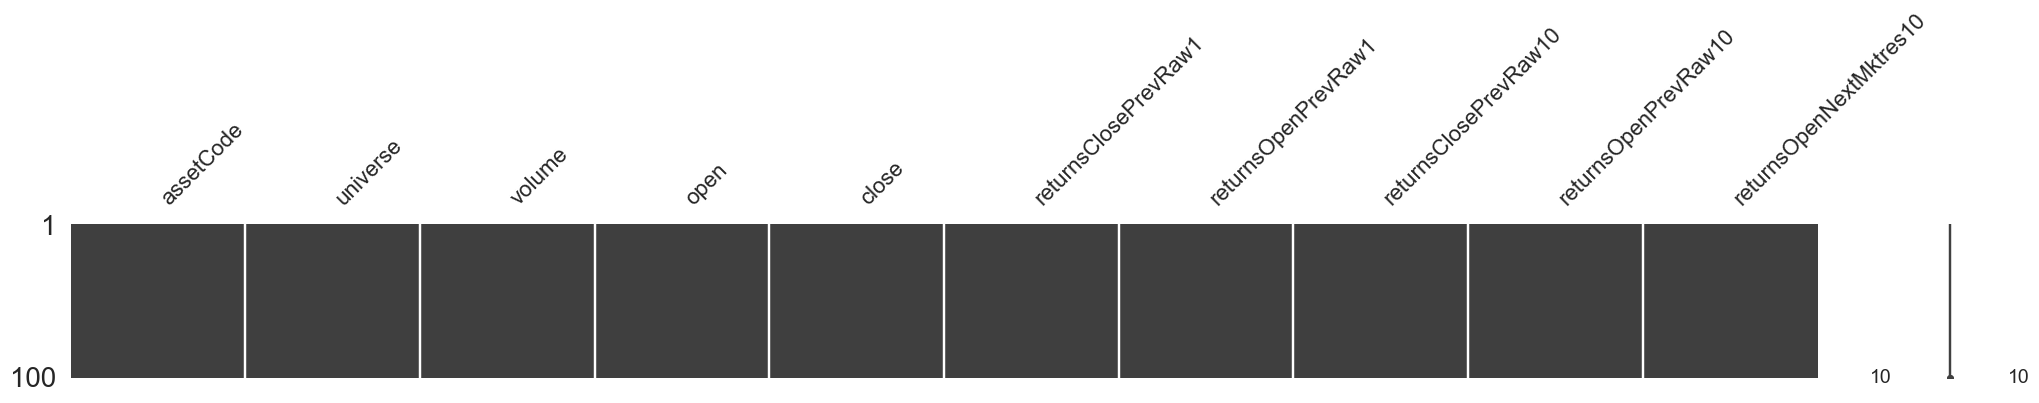

In [284]:
predictor_cols = ["assetCode","universe","volume","open","close",
         'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
         'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
         'returnsOpenNextMktres10'
        ]

flags = ['universe']
numerique = ['volume','open','close']
returns = ['returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsOpenNextMktres10']

msn.matrix(mkt.loc[:,predictor_cols], figsize=(25,2))

The following code is to figure out the validation process is structured and mainly to answer the question about time series features: Can we use data from past days? 

```python
# Init
t = market_train_df.loc[:,['time']].sort_values('time').head(1).values
s = news_train_df.loc[:,['time', 'sourceTimestamp', 'firstCreated']].sort_values('time').head(1).values
f = news_train_df.loc[:,['time', 'sourceTimestamp', 'firstCreated']].sort_values('time').tail(1).values
news_date = pd.DataFrame(columns=['mkt_time', 'snws1', 'snws2', 'snws3', 'nnws1', 'nnws2', 'nnws1'])
c = 0 
news_date = pd.DataFrame({'mkt_time':t,
                          'snws1':s[0][0],'snws2':s[0][1],'snws3':s[0][2],
                          'nnws1':f[0][0], 'nnws2':f[0][1], 'nnws3':f[0][2], 
                          'lenOfNws': news_train_df.shape[0]},
                         index=[c])
c += 1

# Start Validation
    
for (market_obs_df, news_obs_df, predictions_template_df) in days:
    # The target value and universe are not included in the market_obs_df
    # FOR LOOP
    t = market_obs_df.loc[:,['time']].sort_values('time').head(1).values
    s = news_obs_df.loc[:,['time', 'sourceTimestamp', 'firstCreated']].sort_values('time').head(1).values
    f = news_obs_df.loc[:,['time', 'sourceTimestamp', 'firstCreated']].sort_values('time').tail(1).values
    n = pd.DataFrame({'mkt_time':t,'snws1':s[0][0],'snws2':s[0][1],'snws3':s[0][2],
                    'nnws1':f[0][0], 'nnws2':f[0][1], 'nnws3':f[0][2], 
                      'lenOfNws': news_obs_df.shape[0]}, index=[c])
    news_date = pd.concat([news_date,n])
    c += 1
    
    make_random_predictions(predictions_template_df)
    env.predict(predictions_template_df)
    
news_date.drop(0,inplace=True)
news_date['earliest1'] = news_date.snws1 <= news_date.snws2
news_date['earliest2'] = news_date.snws1 <= news_date.snws3
news_date['latest1'] = news_date.nnws1 >= news_date.nnws2
news_date['latest2'] = news_date.nnws1 >= news_date.nnws3

print('Done!')
```